**Install required packages**

Includes Pandas and Sklearn package

In [1]:
# this is the file working on
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Read data csv file and display attributs and types

In [3]:
from google.colab import files
uploaded = files.upload()

Saving COVID19 cases Modified V6.csv to COVID19 cases Modified V6.csv


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv ('COVID19 cases Modified V6.csv')
print(df.dtypes)

Outbreak_Associated    int64
Age_Group              int64
Source_of_Infection    int64
Gender                 int64
Ever_Hospitalized      int64
Ever_in_ICU            int64
Ever_Intubated         int64
Outcome                int64
dtype: object


In [5]:
#df = pd.read_csv ('COVID19 cases Modified V6.csv')
for col in df.columns:
  df[col] = df[col].astype(str)
print(df.dtypes)

Outbreak_Associated    object
Age_Group              object
Source_of_Infection    object
Gender                 object
Ever_Hospitalized      object
Ever_in_ICU            object
Ever_Intubated         object
Outcome                object
dtype: object


In [6]:
print(df)

       Outbreak_Associated Age_Group  ... Ever_Intubated Outcome
0                        1         1  ...              0       1
1                        1         1  ...              0       1
2                        1         1  ...              0       1
3                        1         1  ...              0       1
4                        1         1  ...              0       1
...                    ...       ...  ...            ...     ...
169981                   2         6  ...              0       2
169982                   2         6  ...              1       2
169983                   2         7  ...              0       2
169984                   2         8  ...              1       2
169985                   2         8  ...              0       2

[169986 rows x 8 columns]


In [7]:
# Display first 10 records 
df.head(10)


,Outbreak_Associated,Age_Group,Source_of_Infection,Gender,Ever_Hospitalized,Ever_in_ICU,Ever_Intubated,Outcome
0,1,1,8,1,0,0,0,1
1,1,1,8,1,0,0,0,1
2,1,1,7,1,0,0,0,1
3,1,1,7,1,0,0,0,1
4,1,1,7,1,0,0,0,1
5,1,1,7,1,0,0,0,1
6,1,1,7,1,0,0,0,1
7,1,1,7,1,0,0,0,1
8,1,1,7,1,0,0,0,1
9,1,1,7,1,0,0,0,1


In [8]:
#Meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169986 entries, 0 to 169985
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Outbreak_Associated  169986 non-null  object
 1   Age_Group            169986 non-null  object
 2   Source_of_Infection  169986 non-null  object
 3   Gender               169986 non-null  object
 4   Ever_Hospitalized    169986 non-null  object
 5   Ever_in_ICU          169986 non-null  object
 6   Ever_Intubated       169986 non-null  object
 7   Outcome              169986 non-null  object
dtypes: object(8)
memory usage: 10.4+ MB


In [9]:
#Meta information about numeric data, we can also see if there any extreme values
df.describe()

,Outbreak_Associated,Age_Group,Source_of_Infection,Gender,Ever_Hospitalized,Ever_in_ICU,Ever_Intubated,Outcome
count,169986,169986,169986,169986,169986,169986,169986,169986
unique,2,9,8,3,2,2,2,2
top,2,2,2,1,0,0,0,1
freq,148248,35364,58654,83995,158734,167758,168649,166382


**Decison tree**

In [40]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Outcome' 

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1) 

Below is the code to train the decision tree. I am setting max depth of the tree to 5, you can choose to change it or remove it.

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


Plot the tree

class Names ['1' '2']


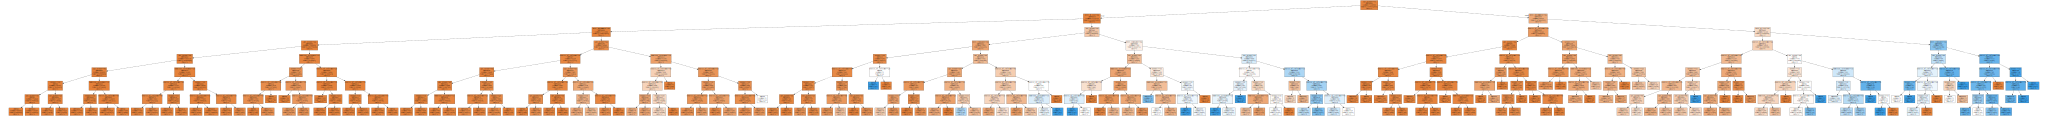

In [46]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph



In [47]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Print confusion matrix.

In [48]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[49767   178]
 [  807   244]]
TP:  244 , FP:  178 , TN:  49767 , FN: 807


In [49]:
#print precision, recall, and accuracy from the perspective of each of the class
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     49945
           2       0.58      0.23      0.33      1051

    accuracy                           0.98     50996
   macro avg       0.78      0.61      0.66     50996
weighted avg       0.98      0.98      0.98     50996



**Analysis using Naive Bayes**

In [50]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [51]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 8


Naive Bayes model confusion matrix

In [52]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  7
Classes  ['1' '2']
Number of records for classes  [116437.   2553.]
Log prior probability for classes  [-0.0216891  -3.84177032]
Log conditional probability for each feature given a class
 [[-1.69958625 -1.05561163 -1.15444019 -1.91263399 -5.26921482 -7.14654277
  -7.82080167]
 [-2.39446941 -0.75636418 -1.29212875 -2.34578089 -3.17686195 -4.15730232
  -4.45802919]]


In [53]:
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[49610   335]
 [  796   255]]
TP:  255 , FP:  335 , TN:  49610 , FN: 796


In [19]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.98      0.99      0.99     49945
           2       0.43      0.24      0.31      1051

    accuracy                           0.98     50996
   macro avg       0.71      0.62      0.65     50996
weighted avg       0.97      0.98      0.97     50996

